In [112]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [113]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percentage:float
    Summary:str

graph=StateGraph(BatsmanState)

In [114]:
def calculate_sr(state:BatsmanState)->BatsmanState:
    runs=state["runs"]
    balls=state["balls"]

    sr=(runs/balls)*100
    return {"sr":sr} ## we are returning the dictionary jo ki humne update kia hai insted of sending the entire state
                    ## this is completly allowed


In [115]:
def calculate_bpb(state:BatsmanState)->BatsmanState:
    balls=state["balls"]
    fours=state["fours"]
    sixes=state["sixes"]

    boundary=fours+sixes

    bpb=balls/boundary

    return {"bpb":bpb}

In [116]:
def calculate_boundary_percentage(state:BatsmanState)->BatsmanState:
    four_run=state["fours"]*4
    six_run=state["sixes"]*6
    total_runs=state["runs"]
    boundary_run=four_run+six_run

    bp=total_runs/boundary_run

    return {"boundary_percentage":bp}

In [117]:
def summary(state:BatsmanState)->BatsmanState:
    summary=f"""
    Strike Rate - {state["sr"]}\n
    Balls Per Boundary - {state['bpb']}\n
    Boundary Percent - {state['boundary_percentage']}\n

    """

    return {"Summary":summary}

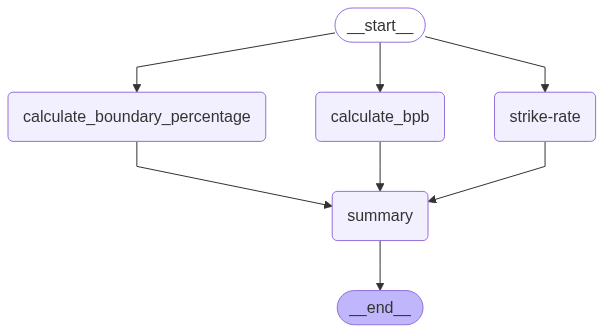

In [118]:
graph.add_node("strike-rate",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_boundary_percentage",calculate_boundary_percentage)
graph.add_node("summary",summary)

graph.add_edge(START,"strike-rate")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_boundary_percentage")


graph.add_edge("strike-rate","summary")
graph.add_edge("calculate_bpb","summary")
graph.add_edge("calculate_boundary_percentage","summary")

graph.add_edge("summary",END)

workflow=graph.compile()
workflow




#### jab hum parallel workflows k andar sara State return krte hai tab hume conflict ata hai 
#### because lanngarph ko ye lahta hai kia apne sare state me chamge kia hai jiski wajh se conflicy aa sakta hai
#### islie langgraph ye allow ni krta , isko thik krne ka lie hume bas jo parallel wale nodes hai usse 
#### instead of sending the entire node hum whi send krenge jo update ho rha hai

#### sara  state ko ni bhejenge , instead dictionary bhejenge jo ki update key and uski 
#### corrosponding value carry krega

In [119]:
initial_state={"runs":100,"balls":58,"fours":10,"sixes":3}
final_state=workflow.invoke(initial_state)
final_state

{'runs': 100,
 'balls': 58,
 'fours': 10,
 'sixes': 3,
 'sr': 172.41379310344826,
 'bpb': 4.461538461538462,
 'boundary_percentage': 1.7241379310344827,
 'Summary': '\n    Strike Rate - 172.41379310344826\n\n    Balls Per Boundary - 4.461538461538462\n\n    Boundary Percent - 1.7241379310344827\n\n\n    '}